- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

In [2]:
import pandas as pd
import os

#### Merge the 12 months of sales data into a single csv file

In [3]:
df = ('./DataScience/Project_1/Sales_Data')
files = [file for file in os.listdir('/Users/jafar/DataScience/Project_1/Sales_Data')]
all_month_data = pd.DataFrame()

for file in files:
  df = pd.read_csv("/Users/jafar/DataScience/Project_1/Sales_Data/"+file)
  all_month_data = pd.concat([all_month_data, df])

all_month_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
all_month_data.to_csv('all_data.csv')

Read in Update dataframe

In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.sample(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
100511,8870,218383,34in Ultrawide Monitor,1,379.99,06/17/19 19:51,"769 Hickory St, Los Angeles, CA 90001"
160033,5248,264359,iPhone,1,700,10/05/19 14:04,"261 West St, San Francisco, CA 94016"
167875,13090,271849,34in Ultrawide Monitor,1,379.99,10/23/19 00:21,"351 Main St, Seattle, WA 98101"
180754,5590,253516,USB-C Charging Cable,1,11.95,09/13/19 12:48,"25 Wilson St, Atlanta, GA 30301"
40075,9681,304890,27in FHD Monitor,1,149.99,12/12/19 13:51,"647 2nd St, San Francisco, CA 94016"


CLEANING DATA


In [6]:
## check nan data
nan_data = all_data[all_data.isnull().any(axis=1)]
nan_data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,1,NaN,NaN,NaN,NaN,NaN,NaN
356,356,NaN,NaN,NaN,NaN,NaN,NaN
735,735,NaN,NaN,NaN,NaN,NaN,NaN
1433,1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_data = all_data.dropna(how = 'any')
all_data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##### Add new month Column

In [8]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data.sample(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
81207,3937,226672,20in Monitor,1,109.99,07/22/19 13:33,"416 Maple St, Los Angeles, CA 90001",07
58497,2986,153350,Wired Headphones,1,11.99,02/05/19 21:39,"252 Willow St, New York City, NY 10001",02
67223,11712,161697,Apple Airpods Headphones,1,150,02/28/19 22:57,"595 2nd St, Los Angeles, CA 90001",02
169640,14855,273536,Lightning Charging Cable,1,14.95,10/11/19 18:03,"59 Maple St, Los Angeles, CA 90001",10
62643,7132,157299,Wired Headphones,1,11.99,02/24/19 22:41,"185 Lincoln St, Dallas, TX 75001",02


In [9]:
## find (Or) in order date column and dont use that 
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]
all_data.shape

(185950, 8)

In [10]:
## convert month colom to int
all_data['month']= all_data['month'].astype('int')
all_data.sample(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
169111,14326,273032,AAA Batteries (4-pack),1,2.99,10/17/19 21:17,"148 South St, Atlanta, GA 30301",10
179080,3916,251917,AA Batteries (4-pack),1,3.84,09/22/19 23:26,"87 1st St, Atlanta, GA 30301",9
85709,8439,230971,Wired Headphones,1,11.99,07/03/19 20:17,"52 Jefferson St, Seattle, WA 98101",7
99387,7746,217302,Bose SoundSport Headphones,1,99.99,06/22/19 21:48,"115 North St, Boston, MA 02215",6
178211,3047,251074,Bose SoundSport Headphones,1,99.99,09/01/19 12:31,"510 Walnut St, Dallas, TX 75001",9


##### Convert data to corect type

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

##### Add city column

In [12]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1] + "," + x.split(",")[2].split(" ")[1])
all_data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,"Dallas,TX"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,"Boston,MA"
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,"Los Angeles,CA"


### Data Exploration!


#### What the best month for sales? How much was earn that month ? 

In [13]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


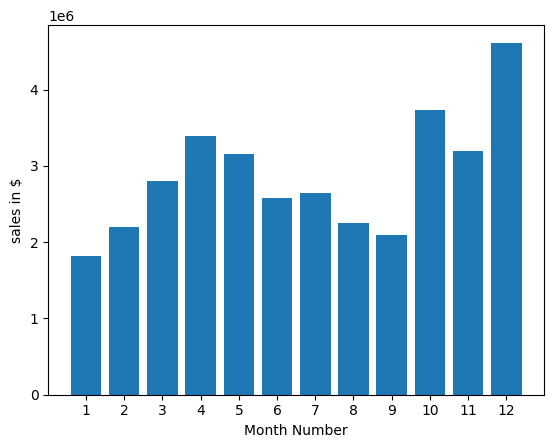

In [14]:
import matplotlib.pyplot as plt

month = range(1,13)

plt.bar(month, all_data.groupby('month').sum()['sales'])
plt.xticks(month)

plt.xlabel('Month Number')
plt.ylabel('sales in $')

plt.show()

#### What city sold the most product?

In [15]:
all_data.groupby(['city']).sum()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
city,,,,,,,,,
"Atlanta,GA",122928154,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
"Austin,TX",82709457,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
"Boston,MA",165758780,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
"Dallas,TX",124308328,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
"Los Angeles,CA",247743297,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80
"New York City,NY",208439450,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,4664317.43
"Portland,ME",20641344,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,449758.27
"Portland,OR",83402354,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,1870732.34
"San Francisco,CA",372569180,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,8262203.91


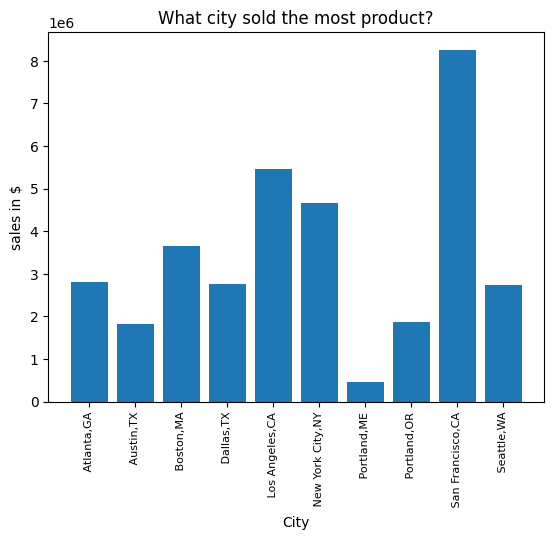

In [16]:
city = [city for city,df in all_data.groupby('city')]

plt.bar(city,all_data.groupby(['city']).sum()['sales'])
plt.xticks(city,rotation='vertical', size =8)
plt.xlabel('City')
plt.ylabel('sales in $')
plt.title("What city sold the most product?")
plt.show()

#### What time should we display advertisements to maximize customer buying product

##### Add time(Hour) column

In [17]:
all_data2 = all_data.copy(deep = True)

In [18]:
all_data2['Order Date'] = pd.to_datetime(all_data2['Order Date'])
all_data2['Hour'] = all_data2['Order Date'].dt.hour
all_data2.head(3)

C:\Users\jafar\AppData\Local\Temp\ipykernel_25132\776613048.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data2['Order Date'] = pd.to_datetime(all_data2['Order Date'])


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,sales,Hour
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,"Dallas,TX",23.90,8
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,"Boston,MA",99.99,22
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,"Los Angeles,CA",600.00,14


In [19]:
all_data2.groupby(all_data2['Hour']).count()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,sales
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


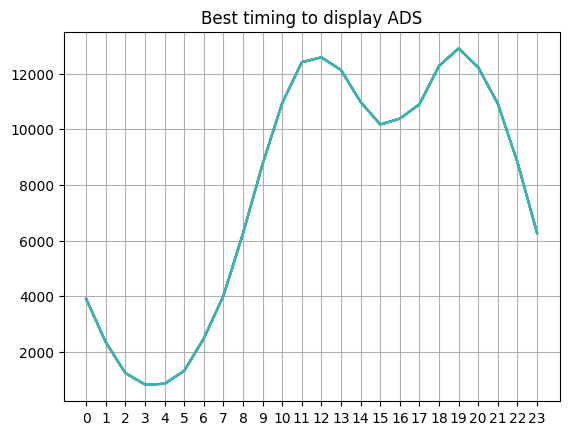

In [24]:
hour = [hour for hour,df in all_data2.groupby('Hour')]

plt.plot(hour, all_data2.groupby(['Hour']).count())
plt.xticks(hour)
plt.grid()
plt.title("Best timing to display ADS")
plt.show()

#### What product sold the most

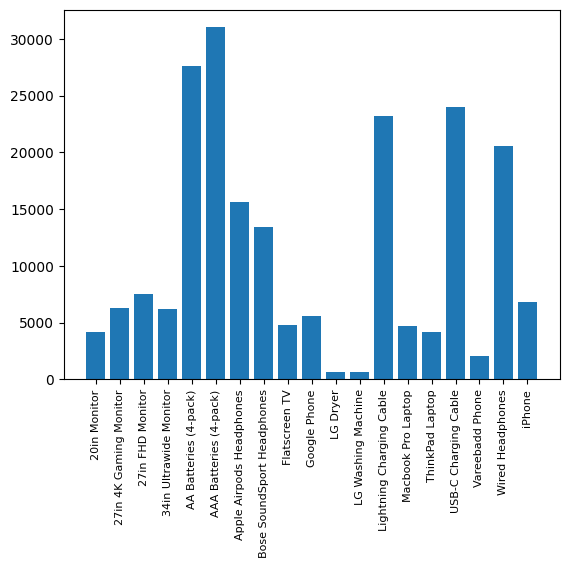

In [21]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [22]:
import numpy as np
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

TypeError: agg function failed [how->mean,dtype->object]

#### What products are mos often sold together

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.shape

In [ ]:
df["Grouped"] = df.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))
df2= df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(5)

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(18):
  print(key,value)